In [74]:
import os
from pprint import pprint
if '_fixed' not in locals():
    _fixed = os.chdir(os.path.dirname(os.getcwd()))
import requests
from tqdm.notebook import tqdm
import re
import chess.pgn
import pandas as pd
import json
from ludwig import repo_root


In [30]:

def get_lichess_game_pgn(game_id: str) -> str | None:
	"""
	Fetches the PGN of a Lichess game from its URL.

	Args:
		game_url: The full URL of the Lichess game.

	Returns:
		The PGN string if successful, otherwise None.
	"""
	# Extract the game ID from the URL (the 8 characters after the domain)
	# match = re.search(r'lichess\.org/([a-zA-Z0-9]{8})', game_url)
	# if not match:
	# 	print("Error: Invalid Lichess game URL format.")
	# 	return None

	# game_id = match.group(1)

	# Construct the API URL for PGN export
	api_url = f"https://lichess.org/game/export/{game_id}"

	# Set headers to request PGN format
	headers = {"Accept": "application/x-pgn"}
	headers = {"Accept": "application/json"}
	# params = {'pgnInJson': True}
	# print(api_url)
	try:
		response = requests.get(api_url, headers=headers,)# params=params)
		response.raise_for_status()  # Raise an exception for bad status codes (4xx or 5xx)
		return response
	except requests.exceptions.RequestException as e:
		print(f"Error fetching game data: {e}")
		# return None
		raise e
		


In [9]:
url = "https://lichess.org/gyFeQsOE"
res = get_lichess_game_pgn(url)
print(res.content.decode('utf-8'))
# text = res.text
# pgn_data = res.json()
# pgn_data

https://lichess.org/game/export/gyFeQsOE
{"id":"gyFeQsOE","rated":true,"variant":"standard","speed":"rapid","perf":"rapid","createdAt":1494612876704,"lastMoveAt":1494613610086,"status":"draw","source":"lobby","players":{"white":{"user":{"name":"psogden2","id":"psogden2"},"rating":1871,"ratingDiff":-6,"analysis":{"inaccuracy":3,"mistake":3,"blunder":3,"acpl":77}},"black":{"user":{"name":"AlexandrC","id":"alexandrc"},"rating":1661,"ratingDiff":21,"provisional":true,"analysis":{"inaccuracy":4,"mistake":1,"blunder":4,"acpl":76}}},"opening":{"eco":"C01","name":"French Defense: Exchange Variation","ply":7},"moves":"e4 e6 d4 d5 exd5 exd5 Nf3 Nf6 c4 dxc4 Bxc4 c6 O-O Be7 Re1 O-O Nc3 Bg4 Qd3 b5 Bb3 Nbd7 Ne5 Nxe5 Rxe5 Bd6 Re3 Bxh2+ Kxh2 Qd6+ Kg1 Rfe8 Bc2 Qf4 Rg3 Re1+ Kh2 Qxf2 Be3 Rxe3 Qxe3 Qxc2 Rh1 Qf5 Kg1 Re8 Qd2 Nh5 Re3 Rxe3 Qxe3 g6 Qe8+ Kg7 Qxc6 Ng3 Rh4 Qg5 Rxg4 Qxg4 Qf3 Qg5 Ne4 Nxe4 Qxe4 Qc1+ Kh2 Qh6+ Kg1 Qc1+ Kh2 Qh6+ Kg1 Qc1+","clocks":[30003,30003,30547,30667,31259,31307,32003,31843,32531,

In [10]:
pgn_data = res.json()
pgn_data

{'id': 'gyFeQsOE',
 'rated': True,
 'variant': 'standard',
 'speed': 'rapid',
 'perf': 'rapid',
 'createdAt': 1494612876704,
 'lastMoveAt': 1494613610086,
 'status': 'draw',
 'source': 'lobby',
 'players': {'white': {'user': {'name': 'psogden2', 'id': 'psogden2'},
   'rating': 1871,
   'ratingDiff': -6,
   'analysis': {'inaccuracy': 3, 'mistake': 3, 'blunder': 3, 'acpl': 77}},
  'black': {'user': {'name': 'AlexandrC', 'id': 'alexandrc'},
   'rating': 1661,
   'ratingDiff': 21,
   'provisional': True,
   'analysis': {'inaccuracy': 4, 'mistake': 1, 'blunder': 4, 'acpl': 76}}},
 'opening': {'eco': 'C01',
  'name': 'French Defense: Exchange Variation',
  'ply': 7},
 'moves': 'e4 e6 d4 d5 exd5 exd5 Nf3 Nf6 c4 dxc4 Bxc4 c6 O-O Be7 Re1 O-O Nc3 Bg4 Qd3 b5 Bb3 Nbd7 Ne5 Nxe5 Rxe5 Bd6 Re3 Bxh2+ Kxh2 Qd6+ Kg1 Rfe8 Bc2 Qf4 Rg3 Re1+ Kh2 Qxf2 Be3 Rxe3 Qxe3 Qxc2 Rh1 Qf5 Kg1 Re8 Qd2 Nh5 Re3 Rxe3 Qxe3 g6 Qe8+ Kg7 Qxc6 Ng3 Rh4 Qg5 Rxg4 Qxg4 Qf3 Qg5 Ne4 Nxe4 Qxe4 Qc1+ Kh2 Qh6+ Kg1 Qc1+ Kh2 Qh6+ Kg1 Qc1+',

In [16]:
datapath = repo_root().joinpath('assets', 'chess', 'puzzles.csv')
df = pd.read_csv(datapath)
df.head()

,PuzzleId,FEN,Moves,Rating,RatingDeviation,Popularity,NbPlays,Themes,GameUrl,OpeningTags,SortKey
0,tewjc,r5k1/pp3p1p/2b2qp1/3pr3/8/4P2P/R1PN1PP1/Q3K2R ...,a2a7 e5e3 f2e3 f6a1 a7a1 a8a1,1493,76,94,18768,crushing discoveredAttack long middlegame xRay...,https://lichess.org/SLbfzQtP#36,Polish_Opening Polish_Opening_Other_variations,1764192
1,0kDWS,1r6/1PN5/3p4/4kpp1/1R6/P3n3/K1P5/8 b - - 0 49,e3d5 b4b5 b8b7 b5b7,1947,75,95,13691,advantage endgame pin short,https://lichess.org/q2SFqfYD/black#97,NaN,1300645
2,f2p5F,5r2/p3R2p/4Q1p1/3B2k1/2p2b2/2P2P2/P5P1/1q3K2 w...,e6e1 b1d3 f1f2 d3d5,1385,75,96,16934,advantage endgame fork short,https://lichess.org/BTADpsgd#76,NaN,1625664
3,LDIfb,rnbqkb1r/pp2pp1p/3p1np1/2p5/4P3/2P2N1P/PP1PBPP...,f6e4 d1a4 b8c6 a4e4,1472,75,95,21527,advantage fork opening short,https://lichess.org/hnuvOm1w/black#9,Sicilian_Defense Sicilian_Defense_Modern_Varia...,2045065
4,mJDcO,5rk1/p1Q3pp/8/3p4/3q1r2/8/P1P3PP/R4R1K w - - 0 21,f1f4 d4a1 f4f1 a1f1,1321,76,95,17352,endgame hangingPiece mate mateIn2 short,https://lichess.org/oAkUCwh7#40,NaN,1648440


In [19]:
df['GameID'] = df['GameUrl'].apply(lambda x: x.split('/')[-2] if 'black#' in x else x.split('/')[-1].split('#')[0])

In [28]:
done = set()
savedir = repo_root().joinpath('assets', 'chess', 'games')
savedir.mkdir(exist_ok=True, parents=True)

In [ ]:
# paths = [savedir.joinpath(f'{ID}.json') for ID in df['GameID']]
# paths = [path for path in paths if not path.exists()]
# for path in tqdm(paths):
#     json.dump(get_lichess_game_pgn(path.stem).json(), path.open('w'), indent=2)

  0%|          | 0/974 [00:00<?, ?it/s]

In [32]:
paths = [savedir.joinpath(f'{ID}.json') for ID in df['GameID']]
len(paths)

1000

In [33]:
data = json.load(paths[0].open('r'))
data

{'id': 'SLbfzQtP',
 'rated': True,
 'variant': 'standard',
 'speed': 'rapid',
 'perf': 'rapid',
 'createdAt': 1426597862255,
 'lastMoveAt': 1426598299144,
 'status': 'resign',
 'source': 'lobby',
 'players': {'white': {'user': {'name': 'zembelek', 'id': 'zembelek'},
   'rating': 2053,
   'ratingDiff': 11,
   'analysis': {'inaccuracy': 4, 'mistake': 0, 'blunder': 4, 'acpl': 60}},
  'black': {'user': {'name': 'tuskerking', 'id': 'tuskerking'},
   'rating': 2081,
   'ratingDiff': -17,
   'analysis': {'inaccuracy': 3, 'mistake': 0, 'blunder': 7, 'acpl': 84}}},
 'winner': 'white',
 'opening': {'eco': 'A00', 'name': 'Polish Opening', 'ply': 1},
 'moves': 'b4 d5 Bb2 Nf6 b5 g6 e3 Bg7 Be2 O-O d4 c6 Nd2 cxb5 a4 bxa4 Rxa4 Bd7 Ra2 Nc6 Ngf3 e5 dxe5 Ng4 Qa1 Re8 h3 Ngxe5 Nxe5 Bxe5 Bxe5 Rxe5 Bb5 Qf6 Bxc6 Bxc6 Rxa7 Rxa7 Qxa7 d4 Qxd4 Qe7 O-O Rd5 Qc3 Qd8 Nf3 Rd1 Nd4 Rxf1+ Kxf1 Bb5+ Nxb5 Qd1+ Qe1 Qxc2 Kg1 Qb3 Nd4 Qb2 Qa5 Qb1+ Kh2 Qf1 Qd8+ Kg7 f3 Qe2 Qe7 Qc4 Qxb7 h5 Qe4 f5 Qe5+ Kh6 h4 Qc1 Qf6 Kh7 Ne6',
 'a

In [63]:
df['num_turns'] = df['GameUrl'].apply(lambda x: int(x.split('#')[1]) if 'black#' in x else int(x.split('#')[1]))
df['num_turns']

0       36
1       97
2       76
3        9
4       40
      ... 
995    102
996     49
997     27
998     34
999     50
Name: num_turns, Length: 1000, dtype: int64

In [75]:
import chess
import chess.pgn

In [94]:
pgns = {}

In [95]:
# sample = df.sample().iloc[0]
for i, sample in tqdm(df.iterrows(), total=len(df)):
    datapath = savedir.joinpath(f'{sample["GameID"]}.json')
    data = json.load(datapath.open('r'))
    moves = data['moves'].split()
    puzzleid = sample['PuzzleId']
    fen = chess.Board(sample['FEN']).fen()
    n_turns = sample['num_turns']

    game = chess.pgn.Game()
    game.headers.clear()

    node = game
    board = chess.Board()
    for move_san in moves:
        if board.fen() != fen:
            try:
                move = board.push_san(move_san)
            except chess.IllegalMoveError:
                print(f"Illegal move: {move_san} in position {board.fen()}")
                break
            except chess.AmbiguousMoveError:
                print(f"Ambiguous move: {move_san} in position {board.fen()}")
                break
            else:
                node = node.add_main_variation(move)
    pgns[puzzleid] = str(game)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [ ]:
# df['pgn'] = df['PuzzleId'].apply(lambda x: pgns[x])


In [101]:
df.head()

,PuzzleId,FEN,Moves,Rating,RatingDeviation,Popularity,NbPlays,Themes,GameUrl,OpeningTags,SortKey,GameID,PGN
0,tewjc,r5k1/pp3p1p/2b2qp1/3pr3/8/4P2P/R1PN1PP1/Q3K2R ...,a2a7 e5e3 f2e3 f6a1 a7a1 a8a1,1493,76,94,18768,crushing discoveredAttack long middlegame xRay...,https://lichess.org/SLbfzQtP#36,Polish_Opening Polish_Opening_Other_variations,1764192,SLbfzQtP,1. b4 d5 2. Bb2 Nf6 3. b5 g6 4. e3 Bg7 5. Be2 ...
1,0kDWS,1r6/1PN5/3p4/4kpp1/1R6/P3n3/K1P5/8 b - - 0 49,e3d5 b4b5 b8b7 b5b7,1947,75,95,13691,advantage endgame pin short,https://lichess.org/q2SFqfYD/black#97,NaN,1300645,q2SFqfYD,1. e4 g6 2. Nf3 Bg7 3. d4 d6 4. h3 Nf6 5. Nc3 ...
2,f2p5F,5r2/p3R2p/4Q1p1/3B2k1/2p2b2/2P2P2/P5P1/1q3K2 w...,e6e1 b1d3 f1f2 d3d5,1385,75,96,16934,advantage endgame fork short,https://lichess.org/BTADpsgd#76,NaN,1625664,BTADpsgd,1. d4 d5 2. Nf3 Nc6 3. Bf4 Nf6 4. e3 e6 5. Bb5...
3,LDIfb,rnbqkb1r/pp2pp1p/3p1np1/2p5/4P3/2P2N1P/PP1PBPP...,f6e4 d1a4 b8c6 a4e4,1472,75,95,21527,advantage fork opening short,https://lichess.org/hnuvOm1w/black#9,Sicilian_Defense Sicilian_Defense_Modern_Varia...,2045065,hnuvOm1w,1. e4 c5 2. Nf3 d6 3. h3 g6 4. c3 Nf6 5. Be2 *
4,mJDcO,5rk1/p1Q3pp/8/3p4/3q1r2/8/P1P3PP/R4R1K w - - 0 21,f1f4 d4a1 f4f1 a1f1,1321,76,95,17352,endgame hangingPiece mate mateIn2 short,https://lichess.org/oAkUCwh7#40,NaN,1648440,oAkUCwh7,1. e4 e5 2. Nf3 Nc6 3. d4 exd4 4. Nxd4 Qf6 5. ...


In [ ]:
# export df to CSV
# df.to_csv(repo_root().joinpath('assets', 'chess', 'puzzles_with_pgn.csv'), index=False)

: 

In [46]:
from ludwig.chess.puzzle import ChessPuzzle
from pathlib import Path
import pandas as pd
from tqdm.notebook import tqdm
import json
from ludwig.util import repo_root
import chess
from stockfish import Stockfish
engine_path = Path(r'C:\Users\anwan\Downloads\stockfish-windows-x86-64\stockfish\stockfish-windows-x86-64.exe')
stockfish = Stockfish(path=engine_path)

In [47]:
task = ChessPuzzle()
task.prepare()
data = task.data
data.head()

,FEN,Moves,Rating,RatingDeviation,Popularity,NbPlays,Themes,GameUrl,OpeningTags,SortKey
PuzzleId,,,,,,,,,,
tewjc,r5k1/pp3p1p/2b2qp1/3pr3/8/4P2P/R1PN1PP1/Q3K2R ...,a2a7 e5e3 f2e3 f6a1 a7a1 a8a1,1493,76,94,18768,crushing discoveredAttack long middlegame xRay...,https://lichess.org/SLbfzQtP#36,Polish_Opening Polish_Opening_Other_variations,1764192
0kDWS,1r6/1PN5/3p4/4kpp1/1R6/P3n3/K1P5/8 b - - 0 49,e3d5 b4b5 b8b7 b5b7,1947,75,95,13691,advantage endgame pin short,https://lichess.org/q2SFqfYD/black#97,NaN,1300645
f2p5F,5r2/p3R2p/4Q1p1/3B2k1/2p2b2/2P2P2/P5P1/1q3K2 w...,e6e1 b1d3 f1f2 d3d5,1385,75,96,16934,advantage endgame fork short,https://lichess.org/BTADpsgd#76,NaN,1625664
LDIfb,rnbqkb1r/pp2pp1p/3p1np1/2p5/4P3/2P2N1P/PP1PBPP...,f6e4 d1a4 b8c6 a4e4,1472,75,95,21527,advantage fork opening short,https://lichess.org/hnuvOm1w/black#9,Sicilian_Defense Sicilian_Defense_Modern_Varia...,2045065
mJDcO,5rk1/p1Q3pp/8/3p4/3q1r2/8/P1P3PP/R4R1K w - - 0 21,f1f4 d4a1 f4f1 a1f1,1321,76,95,17352,endgame hangingPiece mate mateIn2 short,https://lichess.org/oAkUCwh7#40,NaN,1648440


In [3]:
len(set(data.index))

1000

In [4]:
data['FEN'].iloc[0]

'r5k1/pp3p1p/2b2qp1/3pr3/8/4P2P/R1PN1PP1/Q3K2R w K - 0 19'

In [48]:
tags = set()
for i, row in data.iterrows():
	tags.update(row['Themes'].split())
len(tags)

56

In [50]:
print(tags)

{'veryLong', 'opening', 'defensiveMove', 'rookEndgame', 'quietMove', 'zugzwang', 'skewer', 'capturingDefender', 'discoveredAttack', 'exposedKing', 'pin', 'backRankMate', 'oneMove', 'mateIn2', 'fork', 'trappedPiece', 'queenRookEndgame', 'middlegame', 'underPromotion', 'knightEndgame', 'hangingPiece', 'endgame', 'mate', 'dovetailMate', 'long', 'masterVsMaster', 'crushing', 'arabianMate', 'mateIn5', 'advantage', 'superGM', 'attackingF2F7', 'doubleBishopMate', 'mateIn1', 'advancedPawn', 'intermezzo', 'short', 'xRayAttack', 'hookMate', 'deflection', 'mateIn4', 'pawnEndgame', 'doubleCheck', 'promotion', 'attraction', 'anastasiaMate', 'mateIn3', 'queensideAttack', 'clearance', 'kingsideAttack', 'enPassant', 'queenEndgame', 'sacrifice', 'interference', 'master', 'bishopEndgame'}


In [5]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# # show distribution of ratings
# plt.figure(figsize=(10, 6))
# sns.histplot(data['Rating'][:100], bins=30, kde=True)

In [6]:
fen = data['FEN'].iloc[0]

board = chess.Board(fen)

# use stockfish to get the best move
stockfish.set_fen_position(board.fen())
best_move = stockfish.get_best_move()

In [10]:
print(stockfish.get_board_visual(True))

+---+---+---+---+---+---+---+---+
| r |   |   |   |   |   | k |   | 8
+---+---+---+---+---+---+---+---+
| p | p |   |   |   | p |   | p | 7
+---+---+---+---+---+---+---+---+
|   |   | b |   |   | q | p |   | 6
+---+---+---+---+---+---+---+---+
|   |   |   | p | r |   |   |   | 5
+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   |   | 4
+---+---+---+---+---+---+---+---+
|   |   |   |   | P |   |   | P | 3
+---+---+---+---+---+---+---+---+
| R |   | P | N |   | P | P |   | 2
+---+---+---+---+---+---+---+---+
| Q |   |   |   | K |   |   | R | 1
+---+---+---+---+---+---+---+---+
  a   b   c   d   e   f   g   h



In [11]:
best_move

'd2f3'

In [12]:
stockfish.get_evaluation()

{'type': 'cp', 'value': -66}

In [13]:
moves = stockfish.get_top_moves(50)
len(moves)

34

In [14]:
legal_moves = list(board.legal_moves)
len(legal_moves)

34

In [15]:
stockfish.info

'info depth 15 seldepth 30 multipv 1 score cp -82 wdl 0 727 273 nodes 124154 nps 255460 hashfull 41 tbhits 0 time 486 pv d2f3 e5f5 a1f6 f5f6 f3d4 b7b6 f2f3 a7a5 e1f2 c6b7 h1b1 b7a6 a2b2 a6c4 b2b6 f6b6 b1b6'

In [48]:
print(str(board))

r . . . . . k .
p p . . . p . p
. . b . . q p .
. . . p r . . .
. . . . . . . .
. . . . P . . P
R . P N . P P .
Q . . . K . . R


In [55]:
board.ascii()

AttributeError: 'Board' object has no attribute 'ascii'

In [15]:
print(board.unicode(borders=True))

  -----------------
8 |♜|⭘|⭘|⭘|⭘|⭘|♚|⭘|
  -----------------
7 |♟|♟|⭘|⭘|⭘|♟|⭘|♟|
  -----------------
6 |⭘|⭘|♝|⭘|⭘|♛|♟|⭘|
  -----------------
5 |⭘|⭘|⭘|♟|♜|⭘|⭘|⭘|
  -----------------
4 |⭘|⭘|⭘|⭘|⭘|⭘|⭘|⭘|
  -----------------
3 |⭘|⭘|⭘|⭘|♙|⭘|⭘|♙|
  -----------------
2 |♖|⭘|♙|♘|⭘|♙|♙|⭘|
  -----------------
1 |♕|⭘|⭘|⭘|♔|⭘|⭘|♖|
  -----------------
   a b c d e f g h


In [24]:
def board_to_text(board):
	"""
	Creates a text representation of the board with file and rank labels,
	using simple letters for pieces.
	"""
	s = "   a b c d e f g h\n"
	s += " +-----------------+\n"
	for rank in range(7, -1, -1):
		s += f"{rank + 1}|"
		for file in range(8):
			square = chess.square(file, rank)
			piece = board.piece_at(square)

			# The key is piece.symbol() which returns 'P', 'n', 'K', etc.
			symbol = piece.symbol() if piece else "."
			s += f" {symbol}"
		s += f" |{rank + 1}\n"
	s += " +-----------------+\n"
	s += "   a b c d e f g h\n"
	return s

In [26]:
print(board_to_text(board))

   a b c d e f g h
 +-----------------+
8| r . . . . . k . |8
7| p p . . . p . p |7
6| . . b . . q p . |6
5| . . . p r . . . |5
4| . . . . . . . . |4
3| . . . . P . . P |3
2| R . P N . P P . |2
1| Q . . . K . . R |1
 +-----------------+
   a b c d e f g h



In [42]:
depth = 18
# stockfish.depth = depth
stockfish.set_depth(depth)
# stockfish.info
# stockfish.get_parameters()

In [ ]:
analysis = {}
rerun = data.index.tolist()

In [40]:
todo = rerun

In [41]:
len(todo)

1

In [43]:

bad = []
for i in tqdm(todo):
	item = data.loc[i]
	try:
		fen = item['FEN']
		board = chess.Board(fen)
		moves = item['Moves'].split()
		first_move, answer, *other = moves
		board.push_san(first_move)

		stockfish.set_fen_position(board.fen())

		best = stockfish.get_best_move()
		if best != answer:
			bad.append(i)
			print(f"Game {i}: Best move: {best}, expected {answer}, url {item['GameUrl']}, moves {moves}")
			print(item)
			print()

		a = {'ID': i}

		value = stockfish.get_evaluation()
		a['score'] = value['value']

		a['white_view'] = stockfish.get_board_visual(True)
		a['black_view'] = stockfish.get_board_visual(False)

		a['moves'] = stockfish.get_top_moves(board.legal_moves.count())

		analysis[i] = a
	except KeyboardInterrupt:
		raise
	except Exception as e:
		print(f"Error processing game {i}: {e}")
		bad.append(i)
rerun = bad

  0%|          | 0/1 [00:00<?, ?it/s]

In [44]:
# json.dump(analysis, repo_root().joinpath('assets', 'chess', f'analysis.json').open('w'), indent=2)

In [45]:
item

FEN                       8/1p6/4p3/p1k1B1P1/2b5/4KP2/8/8 b - - 2 52
Moves                                            c5d5 g5g6 d5e5 g6g7
Rating                                                          1595
RatingDeviation                                                   80
Popularity                                                        96
NbPlays                                                        17911
Themes             advancedPawn bishopEndgame crushing endgame sa...
GameUrl                       https://lichess.org/NiPQzKJ2/black#103
OpeningTags                                                      NaN
SortKey                                                      1719456
Name: OTEpS, dtype: object

In [55]:
# stockfish.depth = 15
stockfish.get_parameters()

{'Debug Log File': '',
 'Contempt': 0,
 'Min Split Depth': 0,
 'Ponder': 'false',
 'MultiPV': 1,
 'Skill Level': 20,
 'Move Overhead': 10,
 'Minimum Thinking Time': 20,
 'Slow Mover': 100,
 'UCI_Chess960': 'false',
 'UCI_LimitStrength': 'false',
 'UCI_Elo': 1350,
 'Threads': 1,
 'Hash': 16}

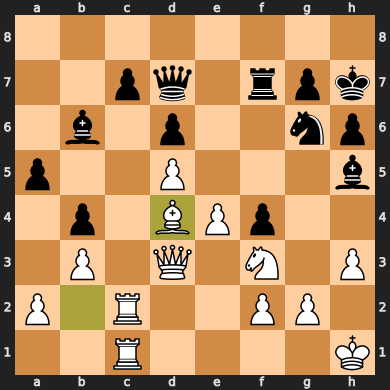

In [53]:
board

In [50]:
stockfish.get_top_moves(3)

[]

In [45]:
# stockfish.get_parameters()
stockfish.get_top_moves(board.legal_moves.count())

[]

In [60]:
stockfish.get_top_moves(2)

[]

In [57]:
answer

'h5f3'